## Boxplots

Using the example from this video https://www.youtube.com/watch?v=IpMhMUcmLJw.


Github for the youtube series: https://github.com/andymcdgeo/Andys_YouTube_Notebooks

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import lasio

In [2]:
df = lasio.read("15-9-19_SR_COMP.LAS").df()

In [3]:
df

,AC,CALI,DEN,GR,NEU,RDEP,RMED
DEPT,,,,,,,
3615.4340,95.7952,12.7249,2.3429,54.8754,44.5742,0.8941,0.8359
3615.5864,94.2267,12.5961,2.3528,53.5158,62.1103,0.7367,0.8028
3615.7388,101.3254,13.7632,2.3170,48.9803,71.9087,0.6423,0.7958
3615.8912,99.5672,14.3249,2.2585,36.6762,44.8988,0.6571,0.7929
3616.0436,100.5965,11.1429,2.2108,40.4632,49.5744,0.7442,0.7940
...,...,...,...,...,...,...,...
4635.9044,NaN,NaN,NaN,NaN,NaN,0.7729,0.5978
4636.0568,NaN,NaN,NaN,NaN,NaN,0.8369,0.6257
4636.2092,NaN,NaN,NaN,NaN,NaN,0.8741,0.6888


## Data Dictionary

 * AC for Acoustic Compressional Slowness
 * CALI for borehole caliper 
 * DEN for Bulk Density 
 * GR for Gamma Ray, 
 * NEU for Neutron Porosity and 
 * RDEP and RMED for deep and medium resistivity.

In [4]:
# drop the nas
# inplace = True remove from the original dataframe (vs. making a copy)

df.dropna(inplace=True)

In [5]:
df

,AC,CALI,DEN,GR,NEU,RDEP,RMED
DEPT,,,,,,,
3615.4340,95.7952,12.7249,2.3429,54.8754,44.5742,0.8941,0.8359
3615.5864,94.2267,12.5961,2.3528,53.5158,62.1103,0.7367,0.8028
3615.7388,101.3254,13.7632,2.3170,48.9803,71.9087,0.6423,0.7958
3615.8912,99.5672,14.3249,2.2585,36.6762,44.8988,0.6571,0.7929
3616.0436,100.5965,11.1429,2.2108,40.4632,49.5744,0.7442,0.7940
...,...,...,...,...,...,...,...
4617.3116,40.0000,6.0000,2.5547,87.1958,15.4080,2.6787,2.1338
4617.4640,40.0000,6.0000,2.5662,90.9071,15.8777,2.6239,2.0865
4617.6164,40.0000,6.0000,2.5702,86.2190,15.8576,2.5898,2.0461


Note we went from 6701 to 6579 rows

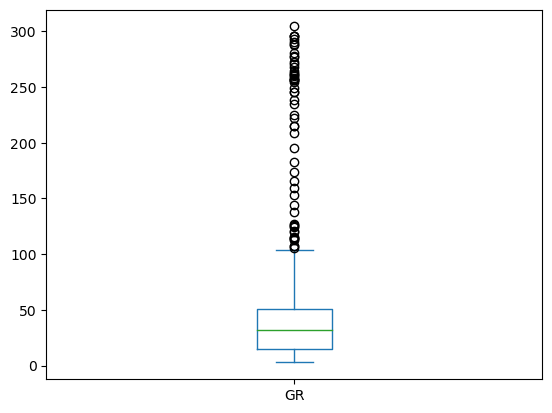

In [6]:
# making a boxplot using pandas
df['GR'].plot(kind='box');

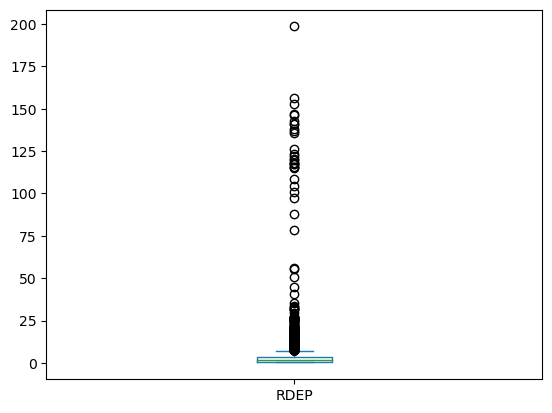

In [7]:
# looking at data that's been log scaled
df['RDEP'].plot(kind='box');

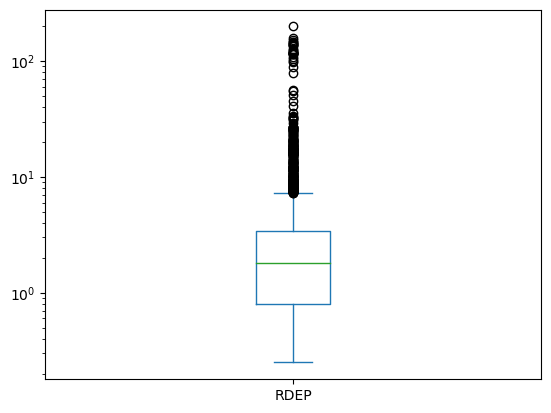

In [9]:
# looking at data that's been log scaled
df['RDEP'].plot(kind='box')
plt.semilogy();

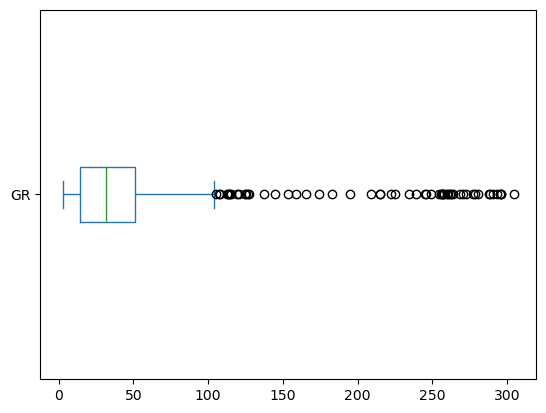

In [11]:
# make it horizontal
# vert = True is the default
df['GR'].plot(kind='box', vert=False);

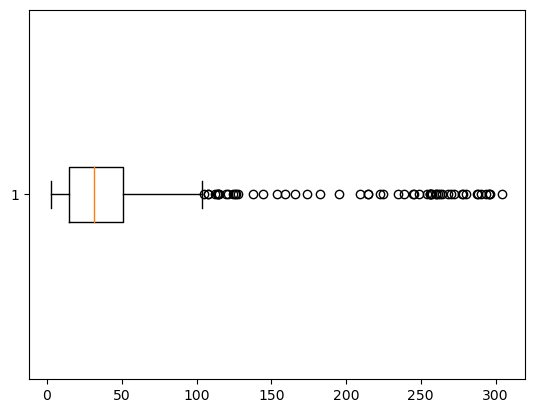

In [12]:
# using matplotlib
plt.boxplot(x=df['GR'], vert=False);

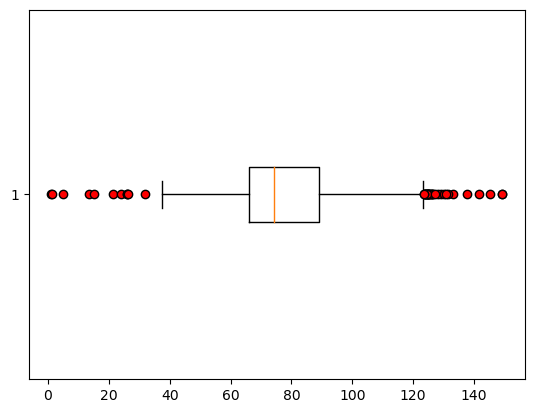

In [14]:
# a few stylistic options
red_circle = dict(markerfacecolor='red',marker='o')
plt.boxplot(x=df['AC'],vert=False, flierprops=red_circle);

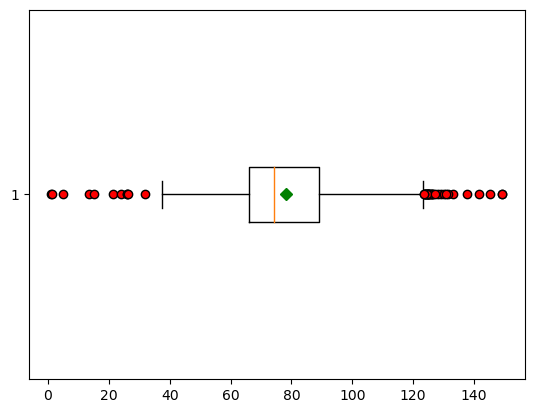

In [16]:
# add the mean
red_circle = dict(markerfacecolor='red',marker='o')
mean_shape = dict(markerfacecolor='green',marker='D', markeredgecolor='green')
plt.boxplot(x=df['AC'], 
            vert=False, 
            flierprops=red_circle, 
            showmeans=True, 
            meanprops=mean_shape);

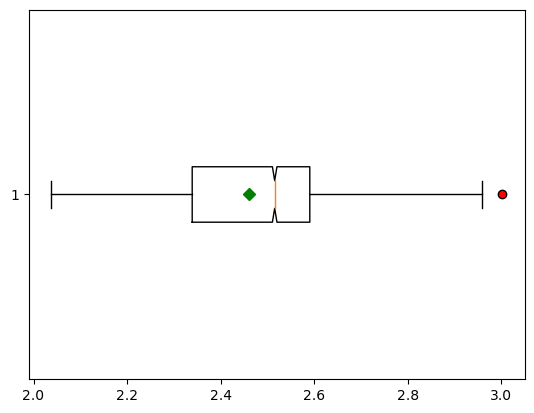

In [17]:
red_circle = dict(markerfacecolor='red', marker='o')
plt.boxplot(x=df['DEN'], 
            vert=False, 
            flierprops=red_circle,
            showmeans=True,
            meanprops=mean_shape, 
            notch=True);

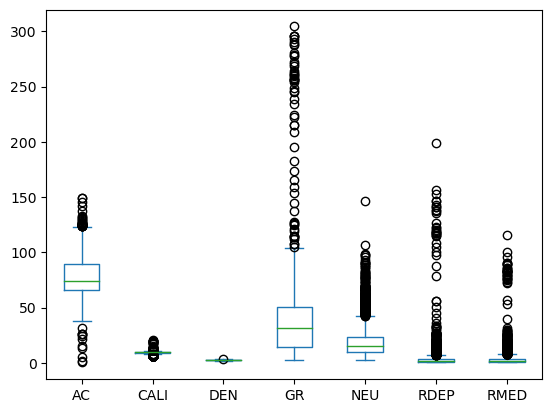

In [18]:
# multiple boxes in a single plot
df.plot(kind='box');

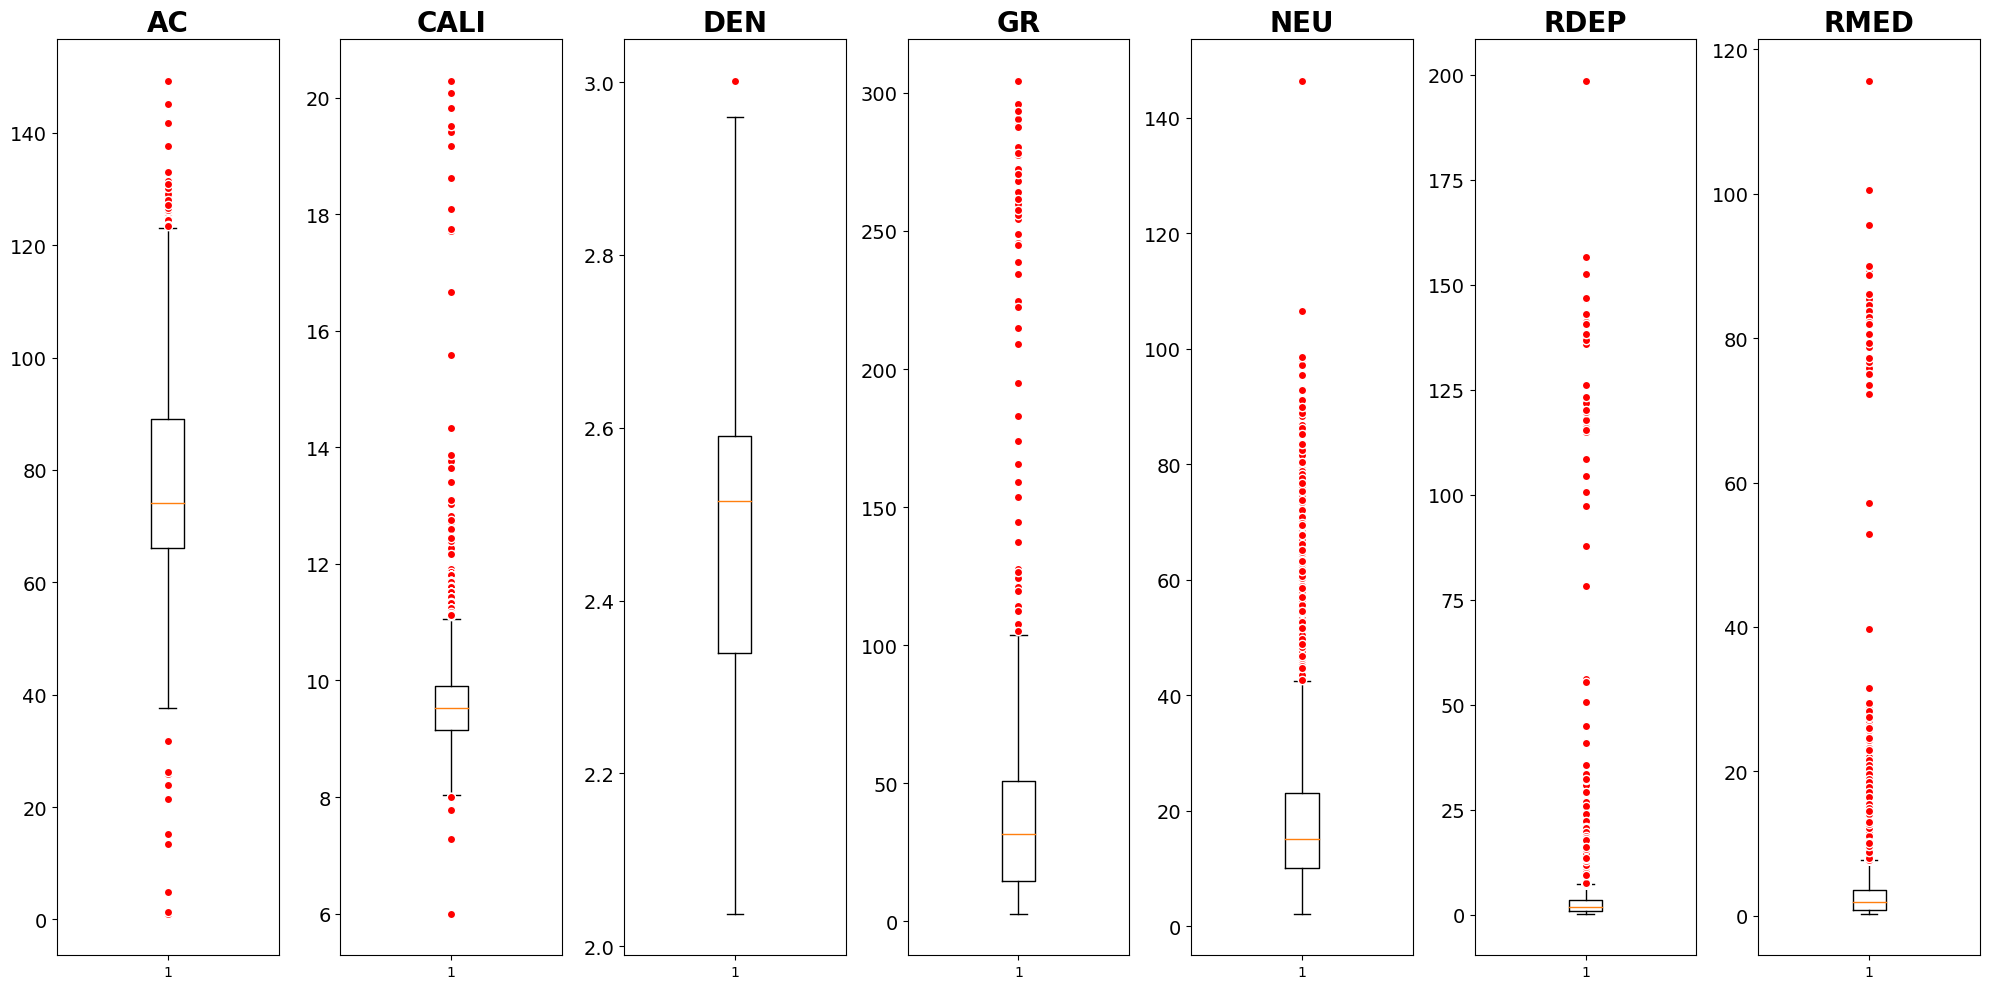

In [22]:
# the scales are all off, so let's make each have its own y scale

red_circle = dict(markerfacecolor='red',
                  marker='o', 
                  markeredgecolor='white')

fig, axs = plt.subplots(1, len(df.columns), 
                         figsize=(20,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df.iloc[:,i], flierprops=red_circle)
    ax.set_title(df.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
    
plt.tight_layout()

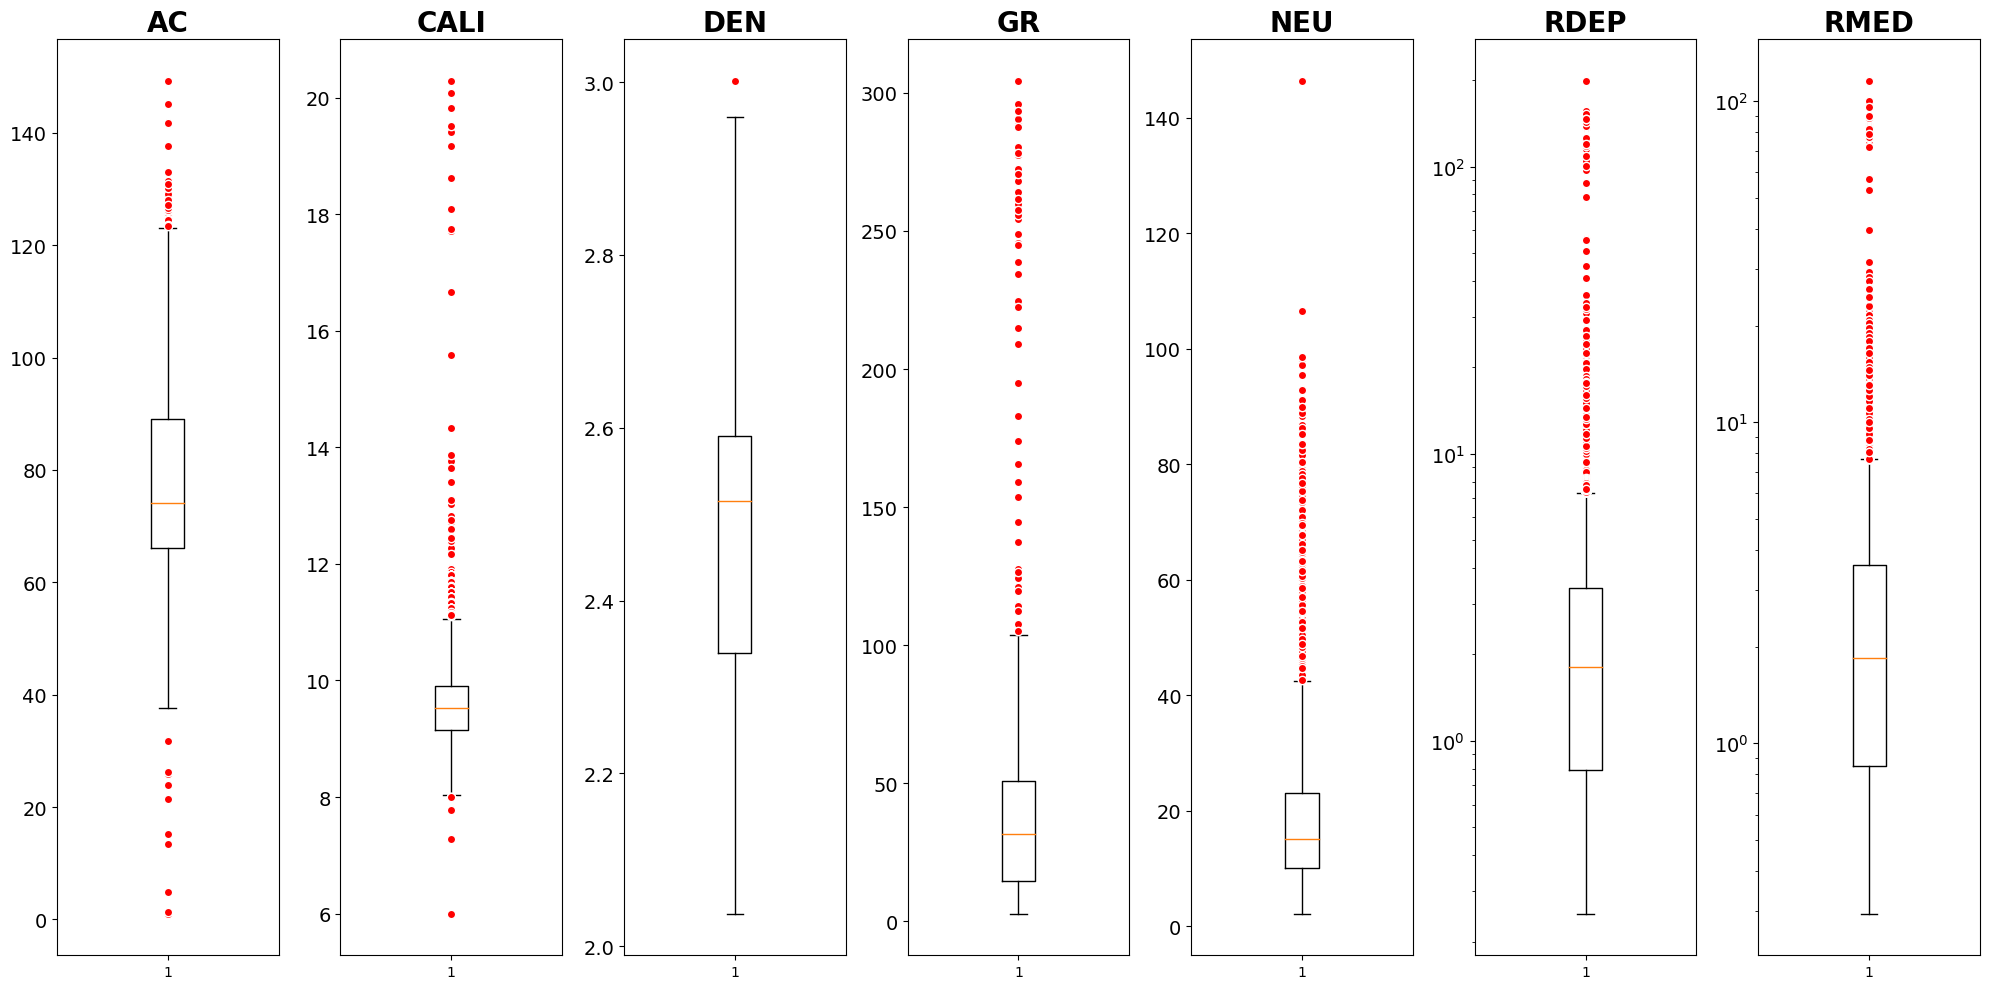

In [23]:
# RDEP and RMED should be semilog

red_circle = dict(markerfacecolor='red',
                  marker='o', 
                  markeredgecolor='white')

fig, axs = plt.subplots(1, len(df.columns), 
                         figsize=(20,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df.iloc[:,i], flierprops=red_circle)
    ax.set_title(df.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
    
    if df.columns[i] == 'RDEP' or df.columns[i] == 'RMED':
        ax.semilogy()
    
plt.tight_layout()